In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Skewness: 1.177531 , highly skewed


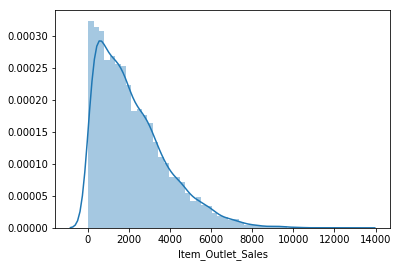

In [5]:
sns.distplot(train["Item_Outlet_Sales"])
print('Skewness: %f' % train['Item_Outlet_Sales'].skew(), ", highly skewed")

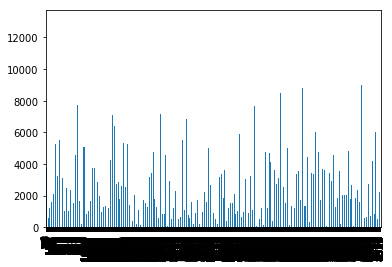

In [24]:
train['Item_Outlet_Sales'].plot(kind='bar')

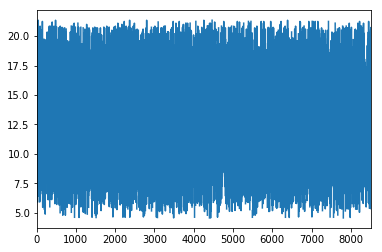

In [27]:
train['Item_Weight'].plot(kind='line')

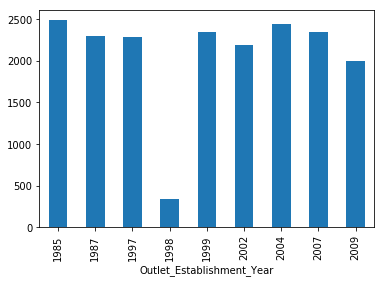

In [10]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().sort_index().plot.bar()

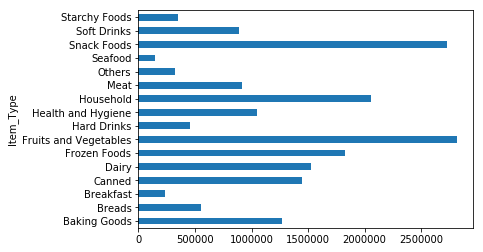

In [18]:
train.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_index().plot.barh()

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


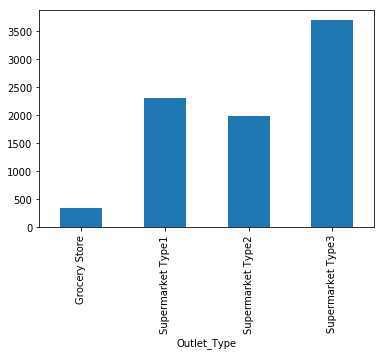

In [26]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()
train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

In [28]:

train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type').mean()

Item_Outlet_Sales    2086.386736
dtype: float64

In [29]:
train_id = train.Item_Identifier
test_id = test.Item_Identifier
y_sales = train.Item_Outlet_Sales

In [30]:
train = train.drop(['Item_Outlet_Sales',"Item_Identifier" ], axis = 1)
test  = test.drop(["Item_Identifier"] , axis =1)

In [33]:
combined_data = pd.concat([train, test] , ignore_index = True)
combined_data.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4705,NaN,Low Fat,0.077428,Frozen Foods,41.8454,OUT019,1985,Small,Tier 1,Grocery Store
1130,NaN,Low Fat,0.012866,Frozen Foods,59.3536,OUT019,1985,Small,Tier 1,Grocery Store
11086,13.5,Regular,0.000000,Starchy Foods,95.8068,OUT017,2007,NaN,Tier 2,Supermarket Type1
1595,11.8,Low Fat,0.058828,Health and Hygiene,80.8618,OUT049,1999,Medium,Tier 1,Supermarket Type1
7043,8.6,Low Fat,0.032615,Health and Hygiene,142.9154,OUT035,2004,Small,Tier 2,Supermarket Type1


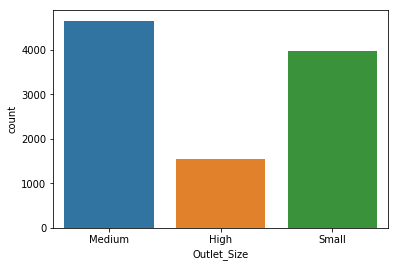

In [34]:
sns.countplot(x="Outlet_Size", data= combined_data)

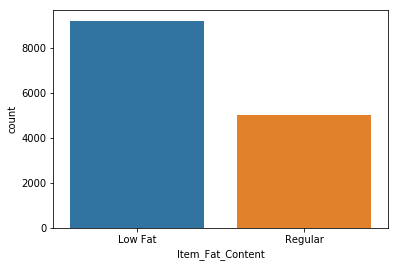

In [35]:
combined_data ["Outlet_Size"] = combined_data["Outlet_Size"].fillna((combined_data["Outlet_Size"].mode()[0] ))
combined_data["Item_Fat_Content"] = combined_data["Item_Fat_Content"].replace({"low fat" :"Low Fat","LF" :"Low Fat", "reg" : "Regular"})
sns.countplot(x="Item_Fat_Content", data= combined_data)

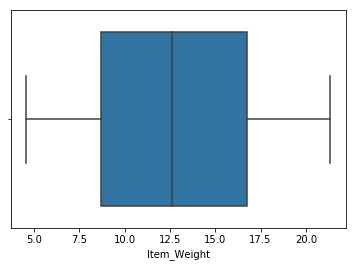

In [36]:
sns.boxplot(x = "Item_Weight", data = combined_data)

In [37]:
combined_data["Item_Weight"] = combined_data["Item_Weight"].fillna((combined_data["Item_Weight"].mean() ))
combined_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [38]:
combined_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [39]:
combined_data = pd.get_dummies(combined_data, columns = ["Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Establishment_Year","Outlet_Size", "Outlet_Location_Type", "Outlet_Type" ], drop_first = True)
combined_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [44]:
X_train = combined_data[:len(train)]
X_test = combined_data[len(train):]

In [45]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\GT\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [46]:
trainX, testX, trainY, testY = train_test_split(X_train, y_sales,test_size = 0.2, random_state = 0) 
from  sklearn.preprocessing  import StandardScaler
slc= StandardScaler()
trainX = slc.fit_transform(trainX)
X_test = slc.transform(X_test)
testX = slc.transform(testX)

C:\Users\GT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\GT\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\GT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\GT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  


In [47]:
num_folds = 10
seed = 0
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=num_folds, random_state=seed)

In [52]:
model = XGBRegressor(n_estimators=70 , learning_rate = .1)
score_= cross_val_score(model, trainX, trainY, cv=kfold, scoring=scoring)
model.fit(trainX, trainY)
predictions = model.predict(testX)
print(r2_score(testY, predictions))
rmse = np.sqrt(mean_squared_error(testY, predictions))

0.575085931140016


In [49]:
rmse = np.sqrt(mean_squared_error(testY, predictions))
rmse

1115.1967355983415

In [50]:
y_pred = model.predict(X_test)
my_submission = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
my_submission.to_csv('submission_sales.csv', index=False)